[출처](https://www.datamanim.com/dataset/ADPpb/00/27.html)

# 머신러닝
## 1. 데이터 확인 및 전처리

### (1) EDA 데이터 탐색

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/problem1.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount,Class
0,60.0,1.069141,0.043786,0.309867,1.316694,-0.462394,-0.857888,0.207904,-0.191270,0.056398,0.041567,-0.507358,-0.108666,-0.473257,0.452046,1.005675,0.185441,-0.439976,89.40,0
1,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,0.00,1
2,426.0,-1.932055,1.724618,1.288229,-0.396998,-0.140202,2.470521,-1.865298,-5.186855,0.794764,0.155379,0.034517,0.906738,-0.027172,-0.404303,-0.473949,0.274034,-0.222340,16.19,0
3,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,529.00,1
4,674.0,-0.719065,0.638954,0.686335,-0.023240,2.317890,3.871978,-0.312797,1.089780,-0.596925,-0.006142,-0.242883,-0.384491,0.109079,0.187565,1.823472,0.274346,-0.697730,22.00,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193 entries, 0 to 1192
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1193 non-null   float64
 1   V1      1193 non-null   float64
 2   V2      1193 non-null   float64
 3   V3      1193 non-null   float64
 4   V4      1193 non-null   float64
 5   V5      1193 non-null   float64
 6   V6      1193 non-null   float64
 7   V7      1193 non-null   float64
 8   V8      1193 non-null   float64
 9   V9      1193 non-null   float64
 10  V10     1193 non-null   float64
 11  V11     1193 non-null   float64
 12  V12     1193 non-null   float64
 13  V13     1193 non-null   float64
 14  V14     1193 non-null   float64
 15  V15     1193 non-null   float64
 16  V16     1193 non-null   float64
 17  V17     1193 non-null   float64
 18  Amount  1193 non-null   float64
 19  Class   1193 non-null   int64  
dtypes: float64(19), int64(1)
memory usage: 186.5 KB


In [3]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
Amount    0
Class     0
dtype: int64

In [4]:
df.Class.value_counts()

0    993
1    200
Name: Class, dtype: int64

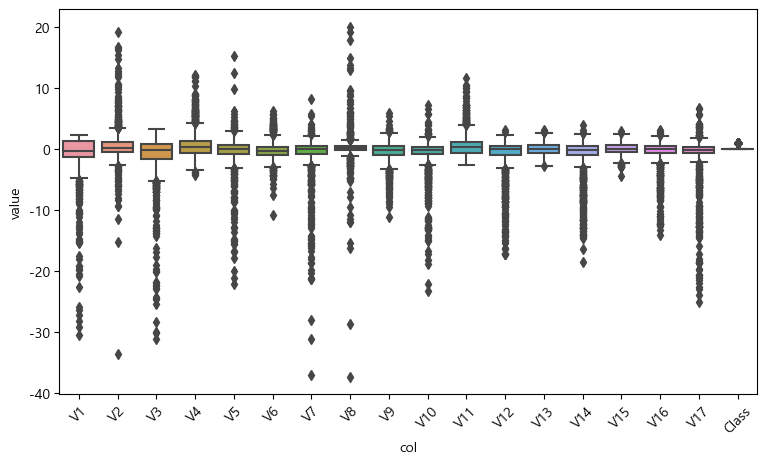

In [5]:
plt.figure(figsize=(9, 5))
X_box= df.copy().drop(columns=['Time', 'Amount'])
X_melt = pd.melt(X_box, var_name='col', value_name='value')
sns.boxplot(data=X_melt, x='col', y='value')
plt.xticks(rotation=45)
plt.show()

[해석]
- 종속변수는 int형, 독립변수는 float형으로 이루어져 있음.
- 모든 컬럼에 결측치는 발견되지 않았음.
- Class 컬럼에서 0은 933개, 1은 200개이므로 데이터 불균형 문제가 존재하기에 오버샘플링 및 언더 샘플링 기법을 활용해야 할 수 있음.
- Amount컬럼 값의 범위가 다른 컬럼들과 달리 크므로 모델 구현 시에 스케일링을 진행해야 할 수 있음.
- 상자그림에서 각 변수에 많은 이상치들이 보이며, 이 이상치들이 사기행위가 들어간 데이터일 활률이 높아 보임.

### (2) 변수간 상관관계를 시각화하고 전처리가 필요함을 설명하라

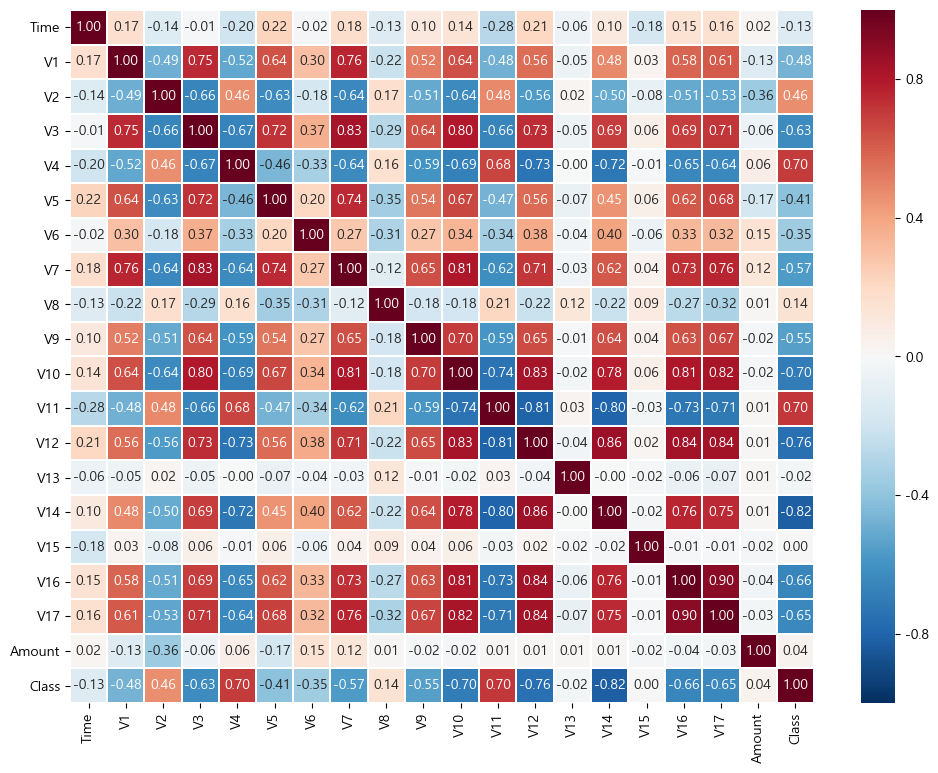

In [6]:
df_corr = df.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(df_corr, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='RdBu_r', linewidth=.3)
plt.show()

[해석]
- 독립변수들 간에 강한 상관간계를 나타내는 경우는 V16과 V17 간의 관계가 존재함.
- 이럴 때에는 원본 데이터 사이즈를 축소시켜 분석을 하는 주성분분석을 수행하지만, 해당 데이터에 차원 축소를 하는 게 적합할지는 분석가의 판단이 필요해 보임.

## 2. 차원축소 (1번이어서)

### (1) 차원축소 방법 2가지 이상 비교하고 한가지 선택
- 주성분분석: 데이터에 여러 변수들이 있을 때, 서로 상관성이 높은 변수들의 선형결합으로 이루어진 주성분이라는 새로운 변수를 만들어 변수를 요약하고 축소하는 기법임, 변수의 성격을 알 수 없는 해당 데이터에 어울리는 분석임.
- 요인분석: 수만은 변수에서 유사한 항목들끼리 묶어서 처리하는 기법으로 이 때는 종속변수와 독립변수의 개념이 없으며, 모든 변수들 간의 관계를 분석함으로써 공통요인을 분석가의 판단으로 묶어서 처리할 수 있음.

### (2) 추천한 한 가지를 실제로 수행하고 선택한 이유 설명
- 해당 데이터처럼 변수들의 성격을 알 수 없을 때에는 분석가의 주관적 견해가 들어갈 수 있는 요인분석은 사용하기 어려움.
- 주성분 분석은 데이터 간의 선형 관계만을 가지고 판단하므로 주어진 데이터를 최대한 보존하여 저차원의 데이터를 얻을 수 있으므로 지금과 같이 가명처리 되어 있는 변수에 적합한 기법임.

In [7]:
# 스케일링
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
amount = scaler.fit_transform(df[['Amount']])
amount

array([[-0.94639854],
       [-1.        ],
       [-0.99029298],
       ...,
       [-0.97168836],
       [-0.91006466],
       [-0.99646254]])

In [8]:
# 원본 데이터에 파생변수 추가
df['Scaled_Amount'] = amount

# 차원을 축소할 데이터만 추출
features = df.columns.drop(['Time', 'Amount', 'Class'])
features

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'Scaled_Amount'],
      dtype='object')

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=18)
pca_fit = pca.fit(df[features])

print('고유값: \n', pca.singular_values_)
print('분산 설명력: \n', pca.explained_variance_ratio_)

고유값: 
 [313.34445642 108.1494526   88.31656842  75.95550775  74.04174398
  54.38022362  48.53052166  44.43119733  42.88301542  41.22188826
  40.02461796  37.7240559   35.89894925  34.29952844  33.25124613
  30.10449767  28.27817612   2.39049112]
분산 설명력: 
 [6.63121024e-01 7.89946023e-02 5.26784682e-02 3.89643386e-02
 3.70255949e-02 1.99724225e-02 1.59066485e-02 1.33329054e-02
 1.24199371e-02 1.14763697e-02 1.08193995e-02 9.61137507e-03
 8.70386688e-03 7.94557011e-03 7.46731749e-03 6.12084716e-03
 5.40071868e-03 3.85942881e-05]


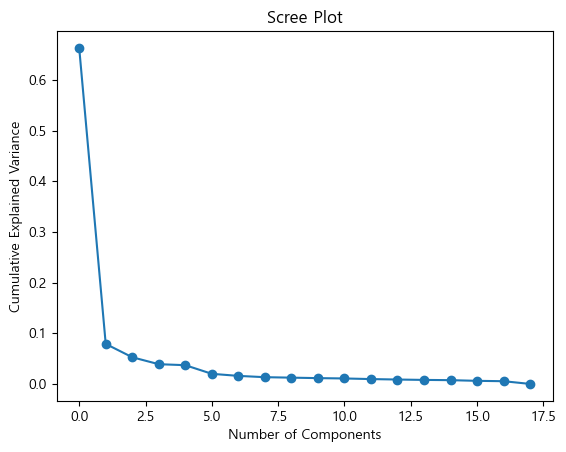

In [10]:
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_ratio_, 'o-')
plt.show()

In [14]:
print('주성분 3개로 축소할 시 분산설명력: ',
     pca.explained_variance_ratio_[:3].sum()*100)
print('주성분 4개로 축소할 시 분산설명력: ',
     pca.explained_variance_ratio_[:4].sum()*100)

주성분 3개로 축소할 시 분산설명력:  79.47940941729141
주성분 4개로 축소할 시 분산설명력:  83.37584327245851


## 3. 오버샘플링/언더샘플링 (1번이어서)

### (1) 오버샘플링과 언더샘플링 장단점 비교 및 선택
1. 오버샘플링
    - 소수의 레이블을 가진 데이터를 샘플링하여 다수의 데이터세트가 가진 레이블의 수 수준으로 감소하는 기법임. 데이터 손실이 없기에 언더 샘플링보다 성능이 유리함. 대표적으로 랜덤 오버 샘플링과 KNN을 이용한 SMOTE 기법이 있음.
    - 랜덤 오버 샘플링은 소수 클래스의 정보를 복제하여 다수 클래스의 크기에 맞추는 기법이며, 오버피팅의 우려가 있음.
    - SMOTE는 KNN을 이용하여 최근접 이웃의 거리 계산을 통해 K개의 중간 지점의 데이터를 생성함. 오버피팅을 막을 수 있지만 새로운 데이터나 작은 데이터세트에서는 사용하기 어려움.
    
1. 언더 샘플링
    - 다수의 레이블을 가진 데이터를 샘플링하여 소수의 데이터세트가 가진 레이블의 수 수준으로 감소하는 기법임. 데이터 불균형 문제를 피할 수 있지만 데이터 수가 급격히 줄어들어 학습 성능이 떨어질 수 있음.
    
데이터 수가 크므로 본 분석에서는 오버샘플링 기법을 이용함.

### (2) 모델 구현 및 위에서 선택한 2가지 이상의 알고리즘으로 모델을 비교하고 성능을 측정

In [ ]:
# 데이터 분할
from sklearn.model_selection import train_test_split
X = df[features]
y = df.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=321)

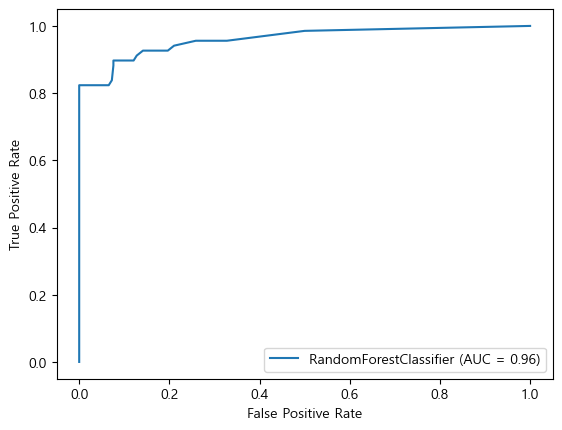

In [28]:
# 0. 원본 데이터 활용
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=321)
rf_clf.fit(X_train, y_train)
# pred_ro = rf_clf_ro.predict(X_test)

plot_roc_curve(rf_clf_ro, X_test, y_test)

C:\Users\user\anaconda3\envs\adp_code\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


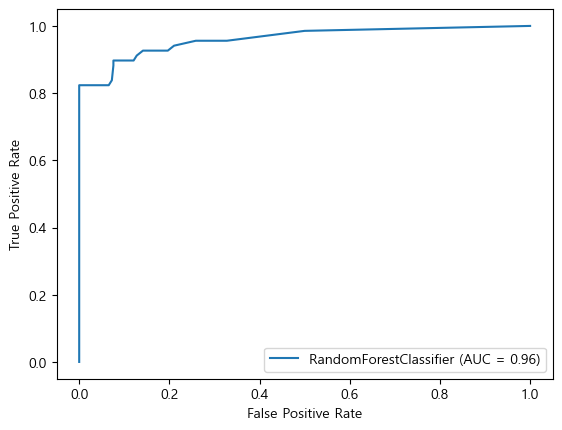

In [26]:
# 1. 랜덤 오버 샘플링
from imblearn.over_sampling import RandomOverSampler
randomover = RandomOverSampler()
X_train_ro, y_train_ro = randomover.fit_resample(X_train, y_train)

from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
rf_clf_ro = RandomForestClassifier(random_state=321)
rf_clf_ro.fit(X_train_ro, y_train_ro)
# pred_ro = rf_clf_ro.predict(X_test)

plot_roc_curve(rf_clf_ro, X_test, y_test)

C:\Users\user\anaconda3\envs\adp_code\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


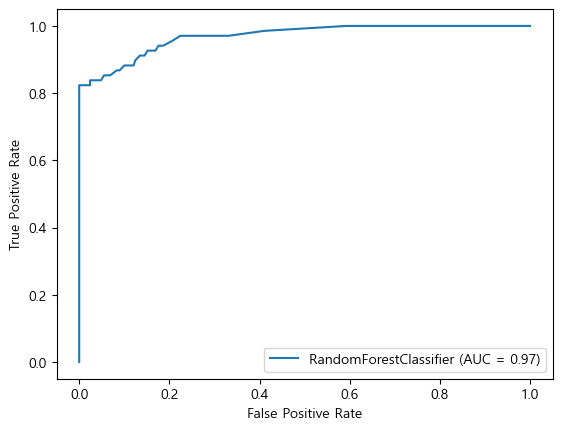

In [27]:
# 2. smote 기법
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
rf_clf_sm = RandomForestClassifier(random_state=321)
rf_clf_sm.fit(X_train_sm, y_train_sm)
# pred_ro = rf_clf_sm.predict(X_test)

plot_roc_curve(rf_clf_sm, X_test, y_test)

[해석]
- 원본 데이터를 이용한 모델의 성능보다 오버 샘플링 기법 두 가지를 적용한 모델의 성능이 좀더 높았음.

### (3) 현재까지 전처리한 데이터를 통해 모델 수행 후 결과 분석
[해석]
- 오버 샘플링 기법을 적용했을 때 AUC가 더 높지만 원본 데이터를 이용한 모델 성능과 큰 차이 없으므로 굳이 가성의 데이터를 만들어 예측력을 높이는 오버 샘플링을 적용시킬 필요가 없다고 판단함.

## 4. 이상탐지 (1번이어서)

### (1) 이상탐지 모델 2가지 이상 기술, 장/단점 설명

### (2) 2번에서 만든 데이터로 한 가지 이상탐지 모델을 구현하고, 3번에서 만든 모델과 비교

### (3) 데이터분석과 관점에서 3번에서 만든 모델과 4번에서 만든 모델 설명